# **Jacob Shearer - Excercise set 6**

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Question 1:**

In [266]:
# Part (a):
def numerov(depth, radius, energy_range, tolerance):
    h = 0.01
    left_x = np.array([])
    i = 0
    xl = -2*radius
    left_index = 0
    while xl < 2*radius:
        xl = (-2*radius)+ i*h
        if xl == float(radius):
            left_index = i
        
        left_x = np.append(left_x, xl)
        i += 1
    
    right_x = np.arange(2*radius, -2*radius-h, -h)
    left_y = np.array([])
    i = 0
    xr = 2*radius
    right_index = 0
    while xr > -2*radius:
        xr = (2*radius) - i*h
        if xr == float(radius):
            right_index = i
        
        right_x = np.append(right_x, xr)
        i += 1
    
    left_wf = np.zeros(len(left_x))
    left_wf[0] = 0
    left_wf[1] = 0.00001
    
    right_wf = np.zeros(len(right_x))
    right_wf[0] = 0
    right_wf[1] = 0.00001
    
    position = left_x
    wavefunction = np.array([])
    k_squared = np.array([])
    
    e_min = energy_range[0]
    e_max = energy_range[1]
    delta_e = 0.01
    e = e_min
    
    max_trials = 100
    trial_step = 0
    
    
    def V(x):
        if np.abs(x) <= radius:
            v = depth
        else:
            v = 0
        
        return v
    
    
    def set_k_squared(x, e):
        k_sq = np.array([])
        two_m_over_hbar_sq = 1  #0.0483
        for x_val in x:
            k_sq = np.append(k_sq, two_m_over_hbar_sq*e-V(x_val))
        
        return k_sq
    
    
    def numerov_alg(wf, k2):
        b = (h**2)/12
        for i in range(len(wf)-1):
            if i == 0 or i == 1:
                continue
            else: 
                wf[i+1] = (2*wf[i]*(1-5*b*k2[i])-(1+b*k2[i-1])*wf[i-1])/(1+b*k2[i+1])
    
    
    while trial_step <= max_trials:
        left_k_sq = set_k_squared(left_x, e)
        right_k_sq = set_k_squared(right_x, e)
        numerov_alg(left_wf, left_k_sq)
        numerov_alg(right_wf, right_k_sq)
        
        left = np.gradient(left_wf)[left_index]/left_wf[left_index]
        right = np.gradient(right_wf)[right_index]/right_wf[right_index]
        delta_e = (left-right)/(left+right)
        if abs(delta_e) < tolerance:
            wavefunction = np.append(left_wf[0:left_index], right_wf[right_index::-1])
            k_squared = left_k_sq
            break
        else:
            if delta_e < 0:
                e_max = e
            else:
                e_min = e
            
            e = (e_min+e_max)/2
            trial_step += 1

    return wavefunction, position, k_squared, e
            

Part (a):


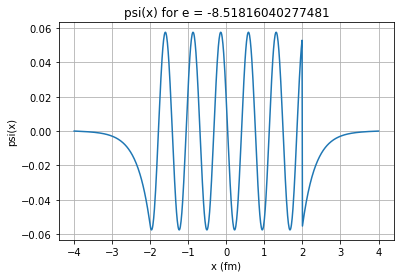

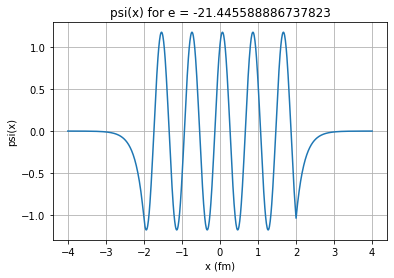

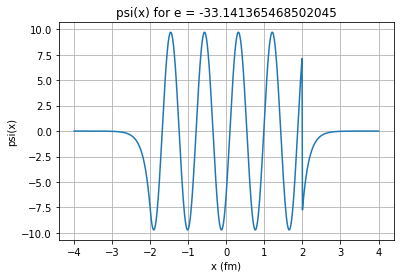

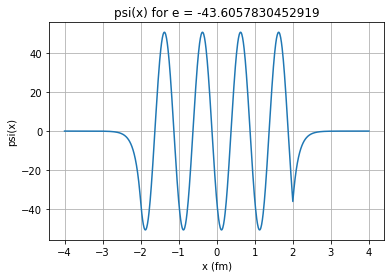

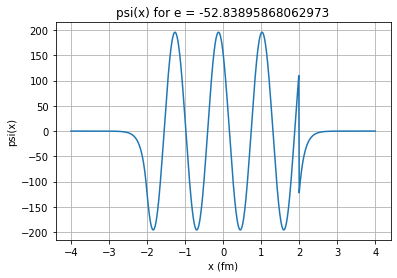

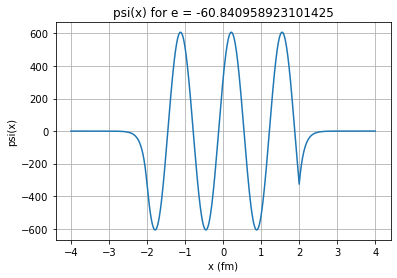

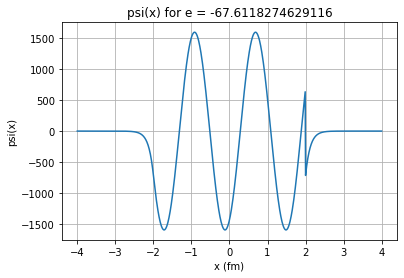

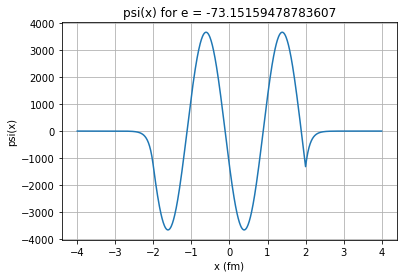

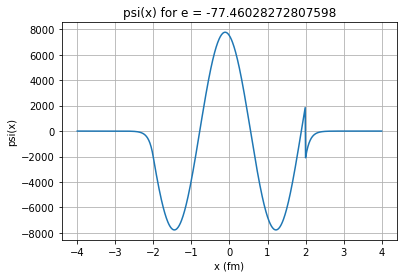

Allowed Energies:
-8.51816040277481 MeV
-21.445588886737823 MeV
-33.141365468502045 MeV
-43.6057830452919 MeV
-52.83895868062973 MeV
-60.840958923101425 MeV
-67.6118274629116 MeV
-73.15159478783607 MeV
-77.46028272807598 MeV


In [267]:
print ('Part (a):')
depth = 83
radius = 2
tolerance = 1e-8
wavefunctions = []
energies = []
k_squareds = []
position = np.array([])
for i in range(depth):
    wavefunction, position, k_squared, e = numerov(-depth, radius, (-i-1, -i), tolerance)
    if len(wavefunction) > 0:
        wavefunctions.append(wavefunction)
        energies.append(e)
        k_squareds.append(k_squared)
        plt.plot(position, wavefunction)
        plt.xlabel('x (fm)')
        plt.ylabel('psi(x)')
        plt.title(f'psi(x) for e = {e}')
        plt.grid(True)
        plt.show()

print('Allowed Energies:')
for energy in energies:
    print(f'{energy} MeV')

Part (b):


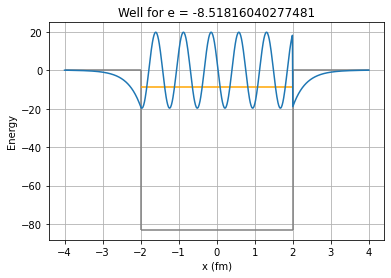

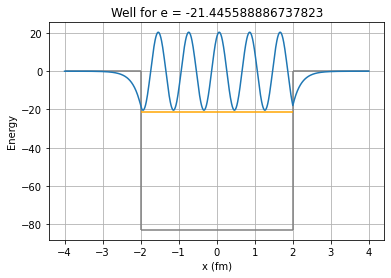

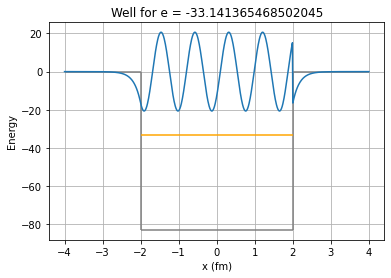

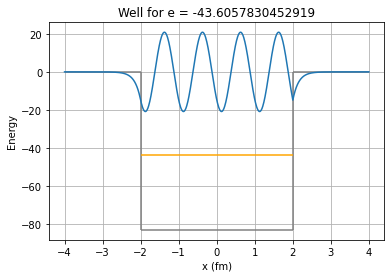

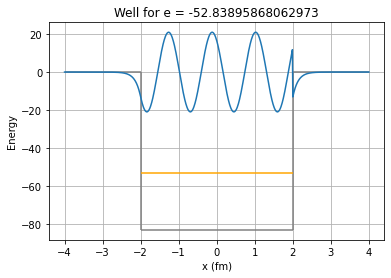

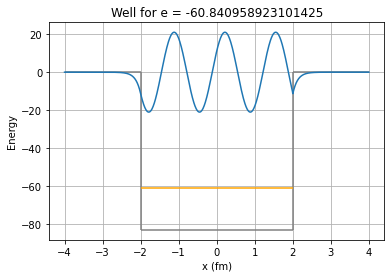

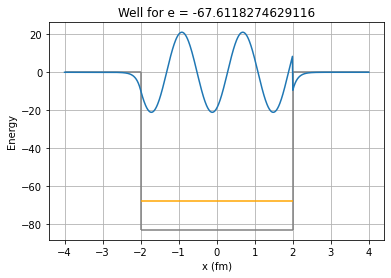

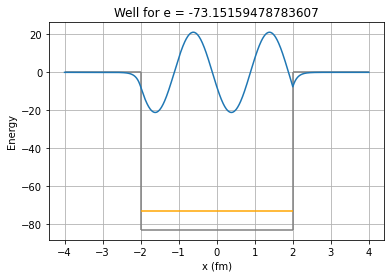

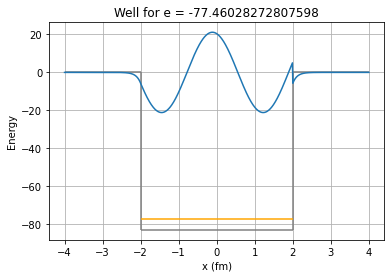

In [255]:
# Part (b):
print('Part (b):')
for i in range(len(wavefunctions)):
    wavefunction = wavefunctions[i]
    e = energies[i]
    norm = 1/np.sqrt(np.sum(np.abs(wavefunction)**2))
    wavefunction = norm*wavefunction*300
    plt.plot(position, wavefunction)
    plt.vlines([-radius, radius], -depth, 0, colors=('gray'))
    plt.hlines([-83, e, 0, 0], (-radius, -radius, -4, 2), (radius, radius, -2, 4), 
               colors=('gray', 'orange', 'gray', 'gray'))
    plt.grid(True)
    plt.title(f'Well for e = {e}')
    plt.xlabel('x (fm)')
    plt.ylabel('Energy')
    plt.show()

In [257]:
# Part (c):
print('Part (c):')
for radius in [4, 2, 1, 0.5]:
    depth = 83
    tolerance = 1e-8
    wavefunctions = []
    energies = []
    k_squareds = []
    position = np.array([])
    for i in range(depth):
        wavefunction, position, k_squared, e = numerov(-depth, radius, (-i-1, -i), tolerance)
        if len(wavefunction) > 0:
            wavefunctions.append(wavefunction)
            energies.append(e)
            k_squareds.append(k_squared)
    
    print(f'For radius = {radius}:')
    print('Energies:')
    print(energies)
    print('\n')

Part (c):
For radius = 4:
Energies:
[-1.5069072842597961, -8.439705550670624, -15.064123541116714, -21.38033577799797, -27.38838478922844, -33.08829069137573, -38.48006546497345, -43.56371721625328, -48.33925184607506, -52.80667382478714, -56.96598681807518, -60.81719373166561, -64.36029699444771, -67.5952986329794, -70.52220039069653]


For radius = 2:
Energies:
[-8.51816040277481, -21.445588886737823, -33.141365468502045, -43.6057830452919, -52.83895868062973, -60.840958923101425, -67.6118274629116, -73.15159478783607, -77.46028272807598]


For radius = 1:
Energies:
[-21.26113986968994, -43.4863201379776, -60.77327036857605, -73.12137219309807, -80.53033152967691]


For radius = 0.5:
Energies:
[-43.45127463340759, -73.11235451698303]




The energies appear to blah blah blah

**Question 2:**